In [3]:
# import tensorflow as tf
# tf.__version__


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [6]:
# compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [7]:
xs = np.array([-1,0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3, -1, 1.0, 3.0, 5.0, 7.0], dtype=float)


In [8]:
model.fit(xs, ys, epochs=300)

Epoch 1/300

1/1 [==============================] - 0s 483ms/step - loss: 14.5491
Epoch 2/300
1/1 [==============================] - 0s 824us/step - loss: 14.5283
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 14.5075
Epoch 4/300
1/1 [==============================] - 0s 537us/step - loss: 14.4867
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 14.4660
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 14.4453
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 14.4246
Epoch 8/300
1/1 [==============================] - 0s 946us/step - loss: 14.4039
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 14.3832
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 14.3626
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 14.3420
Epoch 12/300
1/1 [==============================] - 0s 7ms/step - loss: 14.3214
Epoch 13/300
1/1 [=======================

In [9]:
model.predict([10.0])

1/1 [==============================] - 0s 60ms/step


array([[3.7598085]], dtype=float32)

### Working with Mnist dataset 

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [11]:
# mnist dataset is avilable within tensorflow - api call
mnist_data = tf.keras.datasets.fashion_mnist

In [12]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

In [15]:
np.set_printoptions(linewidth=320)


In [16]:
print(f'label : {train_labels[1]}')
print(f'image : {train_images[1]}')

label : 0
image : [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

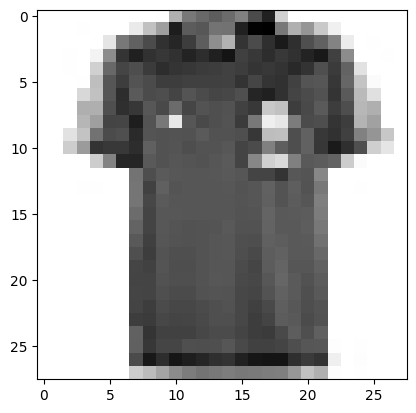

In [17]:
plt.imshow(train_images[2300], cmap='Greys')

In [18]:
# normalize the pixel valies of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# design the model
# input layer with shape of the data 
# output layer with sape of classes

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [30]:
# declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

# feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax funtion : {outputs.numpy()}')

# get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# get the index with highest values
prediction = np.argmax(outputs)
print(f'class wtih highest probability : {prediction}')

input to softmax function : [[1. 3. 4. 2.]]
output of softmax funtion : [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class wtih highest probability : 2


In [21]:
model.compile(optimizer=tf.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30

1875/1875 [==============================] - 2s 1ms/step - loss: 0.7522 - accuracy: 0.7581
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5152 - accuracy: 0.8252
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4697 - accuracy: 0.8392
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4438 - accuracy: 0.8474
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4257 - accuracy: 0.8529
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4111 - accuracy: 0.8573
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4005 - accuracy: 0.8622
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3907 - accuracy: 0.8648
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3820 - accuracy: 0.8678
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.37

In [23]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 0.8731


[0.3528008460998535, 0.8730999827384949]

#### Exercise 7

In [24]:
# with out normalizing to 0-1

In [1]:
# creating a callback class

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        """
        halts the training when the loss falls below 0.4

        Args: 
            epoch (int) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
        """

        #check the loss
        if (logs.get('loss') < 0.4):
            # stop if threshold is met
            print('\nloss is lower than 0.4 so cancelling training ! ')
            self.model.stop_training = True


# instantiate class
callbacks = myCallback()


In [6]:
# Define and compile the model

In [8]:
# define the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer=tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# mnist dataset is avilable within tensorflow - api call
mnist_data = tf.keras.datasets.fashion_mnist
# load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [11]:
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 4.5995 - accuracy: 0.7706
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5359 - accuracy: 0.8230
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.8314
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5016 - accuracy: 0.8324
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8395
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4751 - accuracy: 0.8394
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4571 - accuracy: 0.8440
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4545 - accuracy: 0.8479
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4415 - accuracy: 0.8510
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4